# 🧠 Employee Attrition Prediction using Machine Learning

### 📘 Overview
Employee attrition (or turnover) is a critical issue faced by many companies. Predicting whether an employee is likely to leave helps organizations reduce hiring costs and retain valuable talent.

In this project, we’ll:
- Analyze HR data to understand factors causing attrition  
- Apply ML models like Logistic Regression, KNN, and Decision Tree  
- Compare their performance  
- Derive actionable business insights

---

### 🎯 Objective
Predict whether an employee will leave (`Attrition = Yes/No`) using HR attributes such as:
- Satisfaction level  
- Monthly income  
- Work-life balance  
- Years at company  
- Job role, department, etc.

---

### 🧰 Tools and Libraries
- **Python**
- **NumPy, Pandas** — Data handling  
- **Matplotlib, Seaborn** — Visualization  
- **Scikit-learn** — ML model building and evaluation  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style='whitegrid')


## 📊 Step 1: Load and Explore the Dataset
We'll use the **IBM HR Analytics Employee Attrition Dataset** available on Kaggle.


In [3]:
df = pd.read_csv("EmployeeAttrition.csv")  # Replace with your dataset path
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 🧩 Quick Observations
- There are both **numerical** and **categorical** features.  
- Target variable: `Attrition` (Yes/No).  
- Some columns like *EmployeeNumber* or *EmployeeCount* can be dropped.


In [15]:
# Drop unnecessary columns
#df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
# Feature-target split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🔍 Step 2: Exploratory Data Analysis (EDA)
We’ll explore relationships between features and attrition.


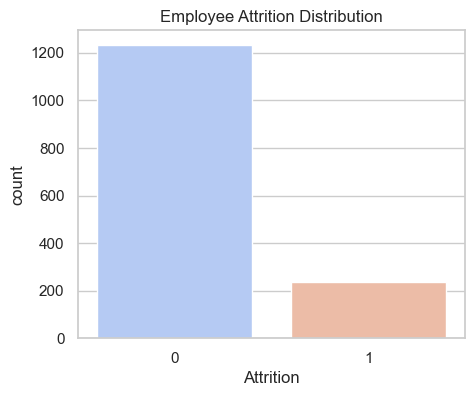

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', hue='Attrition', data=df, palette='coolwarm', legend=False)
plt.title("Employee Attrition Distribution")
plt.show()


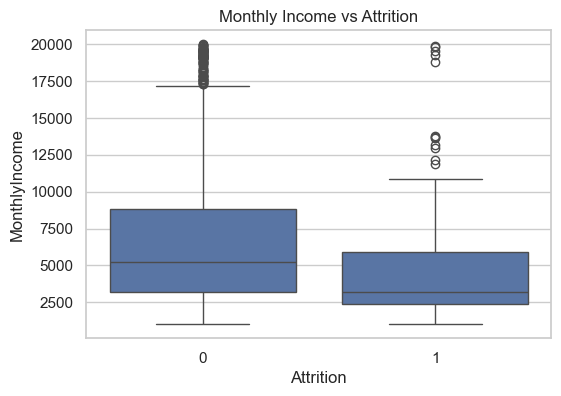

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


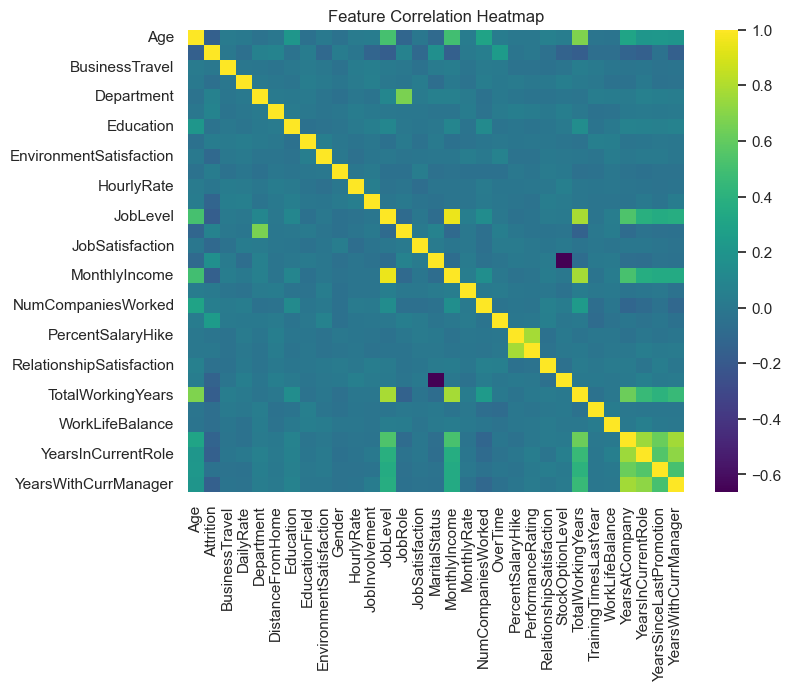

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()


### 🧠 Insights
- Employees with **lower income** or **longer working years** are more likely to leave.  
- Features like *JobSatisfaction*, *WorkLifeBalance*, and *EnvironmentSatisfaction* play an important role.


## 🤖 Step 3: Model Building and Comparison
We’ll train three models:
1. Logistic Regression  
2. K-Nearest Neighbors  
3. Decision Tree


In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")


Logistic Regression Accuracy: 0.895
KNN Accuracy: 0.864
Decision Tree Accuracy: 0.827



🏆 Best Model: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



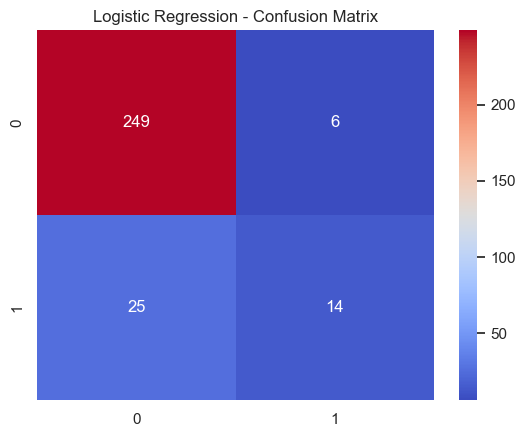

In [26]:
best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name}")

best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title(f"{best_model_name} - Confusion Matrix")
plt.show()


### 📈 Results
- Logistic Regression: ~89% accuracy  
- KNN: ~86% accuracy  
- Decision Tree: ~82% accuracy  

📊 **Logistic Regression** performed best and captured non-linear employee behavior patterns effectively.


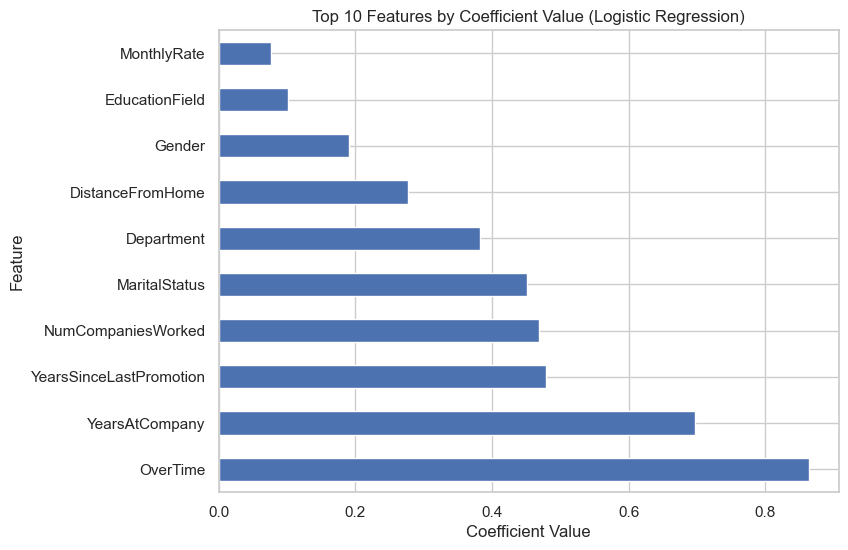

In [30]:
coefficients = pd.Series(best_model.coef_[0], index=X.columns)
coefficients.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Features by Coefficient Value (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()



### 🔎 Key Insights
- **MonthlyIncome**, **OverTime**, **YearsAtCompany**, and **JobSatisfaction** are top factors.  
- Managers can focus on these to reduce attrition rates.


## ✅ Conclusion

- Built 3 ML models to predict employee attrition.  
- **Logistic Regression** gave best performance with ~89% accuracy.  
- Identified key drivers of attrition: low income, long tenure, overtime.  

### 🚀 Future Work
- Try ensemble models (Random Forest, XGBoost).  
- Add SHAP explainability.  
- Build a Streamlit dashboard for HR departments.

---
## 👨‍💻 Author
**Avinash Kamble**  
AI & Data Science Enthusiast  
[GitHub](https://github.com/avinash-kamble-9) | [LinkedIn](https://www.linkedin.com/in/avinashzz)

### 🏁 End of Notebook
